# QuTiP example: Single-Qubit Dynamics

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

In [441]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

%matplotlib inline

In [442]:
def qubit_integrate(epsilon, delta, g1, g2, solver):

    H = epsilon / 2.0 * sigmaz() + delta / 2.0 * sigmax()
        
    # collapse operators
    c_ops = []

    if g1 > 0.0:
        c_ops.append(np.sqrt(g1) * sigmam())

    if g2 > 0.0:
        c_ops.append(np.sqrt(g2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, ntraj, c_ops, [sigmax(), sigmay(), sigmaz()])  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

In [450]:
def state(expect_x, expect_y, expect_z):
    psi = expect_x * sigmax() + expect_y * sigmay() + expect_z * sigmaz()
    return psi.eigenstates()[1][1]

In [451]:
epsilon = 0.0 * 2 * np.pi   # cavity frequency
delta   = 1.0 * 2 * np.pi   # atom frequency
g2 = 0.15
g1 = 0.00

# intial state
#a = 0.5
#psi0 = (a * basis(2,0) + (1-a)*basis(2,1))/(np.sqrt(a**2 + (1-a)**2))
#psi0 = (a * fock_dm(2,0) + (1-a)*fock_dm(2,1))/(np.sqrt(a**2 + (1-a)**2))
#psi0 = Qobj(psi0.diag())
psi0 = state(0, 0, 1)

tlist = np.linspace(0,5,200)

# analytics
sx_analytic = np.zeros(shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist) * np.exp(-tlist * g2)
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist * g2)

psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-1.]
 [ 0.]]

In [474]:
sx1, sy1, sz1 = qubit_integrate(epsilon, delta, g1, g2, "me")

TypeError: qubit_integrate() missing 2 required positional arguments: 'psi0' and 'tlist'

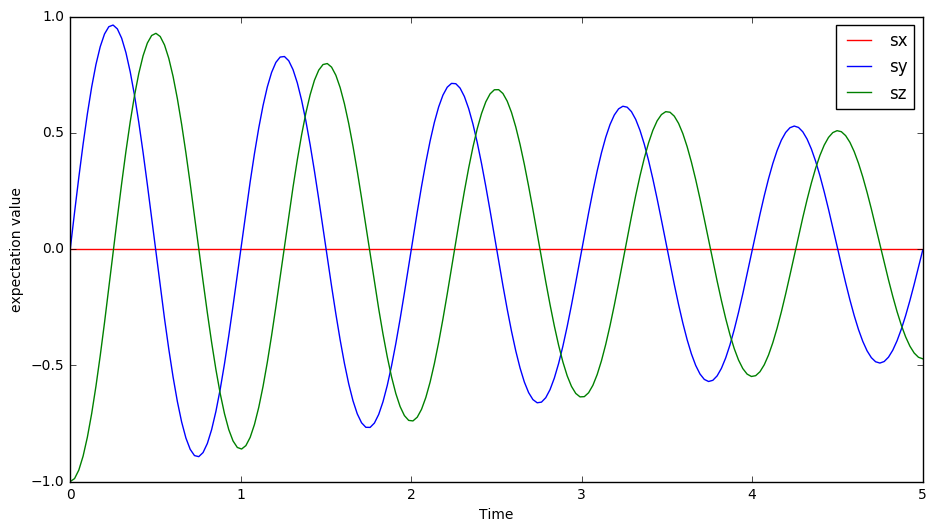

In [453]:
fig, ax = plt.subplots(figsize=(11,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
#ax.plot(tlist, sx_analytic, 'r*')
#ax.plot(tlist, sy_analytic, 'g*')
#ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value');

## Bloch sphere

In [454]:
def qubit_integrate(w, theta, phi, gamma1, gamma2, psi0, tlist):
    # Hamiltonian
    sx = sigmax()
    sy = sigmay()
    sz = sigmaz()
    sm = sigmam()
    H = w * (np.sin(theta)*np.cos(phi) * sx + np.sin(theta)*np.sin(phi) * sy + np.cos(theta)*sz)
    # collapse operators
    c_op_list = []
    n_th = 0.5 # zero temperature
    rate = gamma1 * (n_th + 1)
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm)
    rate = gamma1 * n_th
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sm.dag())
    rate = gamma2
    if rate > 0.0:
        c_op_list.append(np.sqrt(rate) * sz)
    # evolve and calculate expectation values
    output = mesolve(H, psi0, tlist, c_op_list, [sx, sy, sz])  
    return output.expect[0], output.expect[1], output.expect[2]

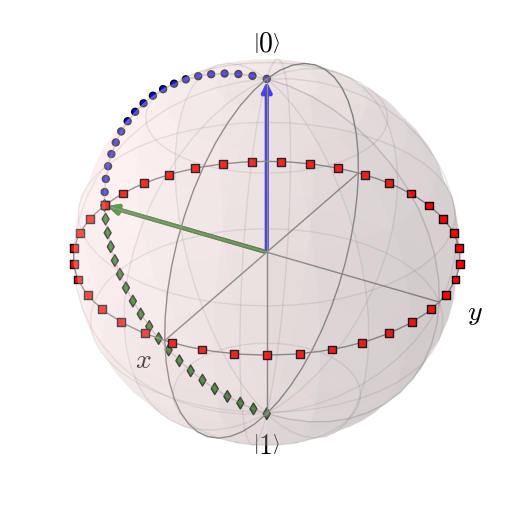

In [475]:
sphere=Bloch()
sphere.vector_color = ['b', 'r', 'g']

w     = 2 * np.pi   # qubit angular frequency
gamma1 = 0.00      # qubit relaxation rate
gamma2 = 0.00      # qubit dephasing rate

theta = 0.50 * np.pi       # qubit angle from sigma_z axis (toward sigma_x axis)
phi   = 0.00 * np.pi       # qubit angle from sigma_x axis (toward sigma_y axis)
tlist = np.linspace(0,0.25*w/(np.pi*4),20)
# initial state
psi0 = state(0, 0, 1)
sx, sy, sz = qubit_integrate(w, theta, phi, gamma1, gamma2, psi0, tlist)
sphere.add_points([sx,sy,sz])
sphere.add_vectors([sx[0], sy[0], sz[0]])

theta = 0.00 * np.pi       # qubit angle from sigma_z axis (toward sigma_x axis)
phi   = 0.00 * np.pi       # qubit angle from sigma_x axis (toward sigma_y axis)
tlist = np.linspace(0,1.0*w/(np.pi*4),40)
# initial state
psi0 = state(sx[-1], sy[-1], sz[-1])
sx, sy, sz = qubit_integrate(w, theta, phi, gamma1, gamma2, psi0, tlist)
sphere.add_points([sx,sy,sz])
sphere.add_vectors([sx[0], sy[0], sz[0]])

theta = 0.50 * np.pi       # qubit angle from sigma_z axis (toward sigma_x axis)
phi   = 0.00 * np.pi       # qubit angle from sigma_x axis (toward sigma_y axis)
tlist = np.linspace(0,0.25*w/(np.pi*4),20)
# initial state
psi0 = state(sx[-1], sy[-1], sz[-1])
sx, sy, sz = qubit_integrate(w, theta, phi, gamma1, gamma2, psi0, tlist)
sphere.add_points([sx,sy,sz])
sphere.add_vectors([sx[0], sy[0], sz[0]])

#sphere.add_vectors([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)])

sphere.show()

## Versions

In [159]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.0.2
Numpy,1.11.1
SciPy,0.18.1
matplotlib,1.5.3
Cython,0.24.1
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,5.1.0
Python,"3.5.2 |Anaconda 4.2.0 (x86_64)| (default, Jul 2 2016, 17:52:12) [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]"
OS,posix [darwin]
